In [1]:
!pip install opencv-python matplotlib pillow

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import json

# Укажите путь к вашему файлу JSON
file_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'

# Открытие и чтение файла JSON
with open(file_path, 'r') as f:
    data = json.load(f)

# Вывод первых нескольких строк данных для проверки
print(data)

{'info': {'year': '2025', 'version': '10', 'description': 'Exported from roboflow.com', 'contributor': '', 'url': 'https://app.roboflow.com/datasets/wind-turbines-dar1t/10', 'date_created': '2025-04-20T14:49:17+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/licenses/by/4.0/', 'name': 'CC BY 4.0'}], 'categories': [{'id': 0, 'name': 'damage', 'supercategory': 'none'}, {'id': 1, 'name': 'corrosion', 'supercategory': 'damage'}, {'id': 2, 'name': 'lightning', 'supercategory': 'damage'}, {'id': 3, 'name': 'lightning receptor', 'supercategory': 'damage'}, {'id': 4, 'name': 'missing teeth', 'supercategory': 'damage'}, {'id': 5, 'name': 'patch', 'supercategory': 'damage'}], 'images': [{'id': 0, 'license': 1, 'file_name': '20240120_155211_mp4-0213_jpg.rf.3f263dc0da2a5ae57494f8d977b901ca.jpg', 'height': 1920, 'width': 1080, 'date_captured': '2025-04-20T14:49:17+00:00', 'extra': {'name': '20240120_155211_mp4-0213.jpg'}}, {'id': 1, 'license': 1, 'file_name': '20240120_155211_mp

Всего изображений в аннотациях: 1070


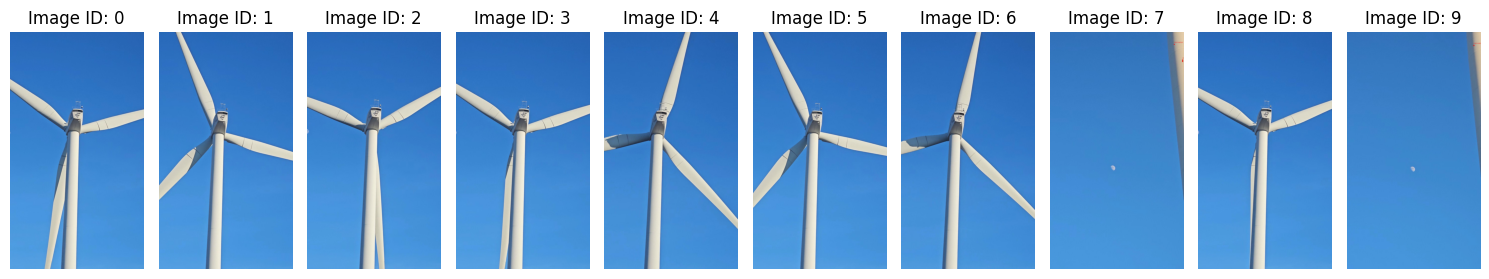

In [9]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Пути к файлам
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'
images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/'

# Загрузка аннотаций
with open(annotations_path) as f:
    coco_data = json.load(f)

# Получение информации о категориях
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Создание словарей для быстрого доступа
images_dict = {img['id']: img for img in coco_data['images']}
annotations_dict = {}
for ann in coco_data['annotations']:
    if ann['image_id'] not in annotations_dict:
        annotations_dict[ann['image_id']] = []
    annotations_dict[ann['image_id']].append(ann)

# Вывод количества изображений
num_images = len(coco_data['images'])
print(f"Всего изображений в аннотациях: {num_images}")

# Функция для отрисовки bbox на изображении
def draw_bboxes(image_path, annotations):
    # Загрузка изображения
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Отрисовка каждого bbox
    for ann in annotations:
        bbox = ann['bbox']
        category_id = ann['category_id']
        category_name = categories[category_id]

        # COCO bbox формат: [x, y, width, height]
        x, y, w, h = map(int, bbox)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, category_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    return img

# Визуализация изображений с bbox
plt.figure(figsize=(15, 10))
num_to_show = min(10, num_images)  # Покажем максимум 5 изображений

for i, (img_id, img_info) in enumerate(list(images_dict.items())[:num_to_show]):
    image_path = os.path.join(images_folder, img_info['file_name'])

    if not os.path.exists(image_path):
        print(f"Файл {image_path} не найден!")
        continue

    if img_id in annotations_dict:
        img_with_boxes = draw_bboxes(image_path, annotations_dict[img_id])
    else:
        img_with_boxes = Image.open(image_path)

    plt.subplot(1, num_to_show, i+1)
    plt.imshow(img_with_boxes)
    plt.title(f"Image ID: {img_id}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:

categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
categories

{0: 'damage',
 1: 'corrosion',
 2: 'lightning',
 3: 'lightning receptor',
 4: 'missing teeth',
 5: 'patch'}

In [13]:
annotations_dict['image_id']

KeyError: 'image_id'

In [12]:
annotations_dict

{7: [{'id': 0,
   'image_id': 7,
   'category_id': 1,
   'bbox': [999, 105, 4.87, 5.41],
   'area': 26.347,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 1,
   'image_id': 7,
   'category_id': 1,
   'bbox': [1066, 231, 5.68, 17.32],
   'area': 98.378,
   'segmentation': [],
   'iscrowd': 0}],
 9: [{'id': 2,
   'image_id': 9,
   'category_id': 1,
   'bbox': [1020, 113, 5.07, 7.27],
   'area': 36.859,
   'segmentation': [],
   'iscrowd': 0}],
 10: [{'id': 3,
   'image_id': 10,
   'category_id': 4,
   'bbox': [1380, 583, 22.81, 67.58],
   'area': 1541.5,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 4,
   'image_id': 10,
   'category_id': 4,
   'bbox': [1310, 1111, 21.12, 38.86],
   'area': 820.723,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 5,
   'image_id': 10,
   'category_id': 4,
   'bbox': [1358, 706, 28.72, 117.42],
   'area': 3372.302,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 6,
   'image_id': 10,
   'category_id': 4,
   'bbox': [1232, 1691, 22.81, 74.34],
 

Найдено изображение: DJI_0055_JPG.rf.6790bfee2af07b343b52c463b1084cb7.jpg (ID: 1069)


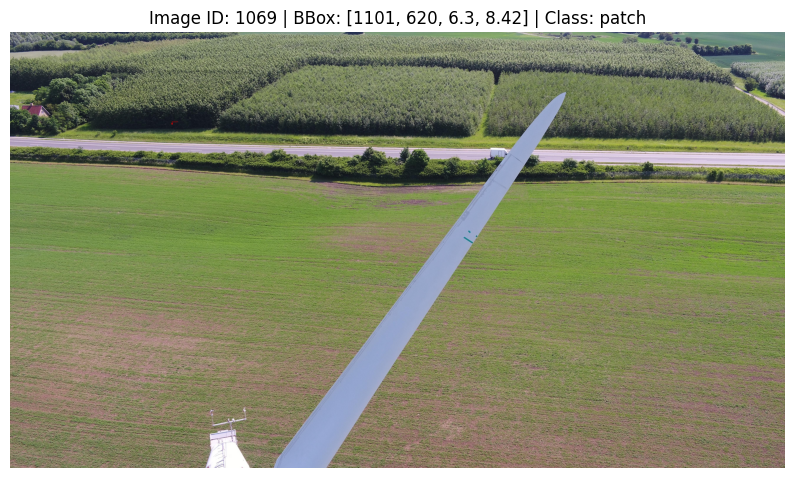

In [15]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Пути
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'
images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/'


# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# Словарь категорий (category_id -> имя)
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Находим изображение с image_id = 1068
image_info = next((img for img in coco_data['images'] if img['id'] == 1069), None)

if image_info is None:
    print("Изображение с image_id=1068 не найдено в аннотациях!")
else:
    print(f"Найдено изображение: {image_info['file_name']} (ID: {image_info['id']})")

    # Загружаем изображение
    image_path = os.path.join(images_folder, image_info['file_name'])
    if not os.path.exists(image_path):
        print(f"Файл {image_path} не существует!")
    else:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем BGR -> RGB

        # Данные аннотации
        bbox = [1101, 620, 6.3, 8.42]  # [x, y, width, height]
        category_id = 5
        category_name = categories.get(category_id, f"Unknown ({category_id})")

        # Рисуем bounding box
        x, y, w, h = map(int, bbox)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Синий прямоугольник
        cv2.putText(img, category_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

        # Выводим изображение
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.title(f"Image ID: {image_info['id']} | BBox: {bbox} | Class: {category_name}")
        plt.axis('off')
        plt.show()

In [16]:
import json

# Путь к файлу аннотаций
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'

# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# Находим все аннотации для image_id = 1069
annotations_for_1069 = [ann for ann in coco_data['annotations'] if ann['image_id'] == 1069]

# Выводим результат
if annotations_for_1069:
    print(f"Найдено {len(annotations_for_1069)} аннотаций для image_id=1069:")
    for i, ann in enumerate(annotations_for_1069, 1):
        print(f"\nАннотация {i}:")
        print(f"ID аннотации: {ann['id']}")
        print(f"Категория (category_id): {ann['category_id']}")
        print(f"Bounding Box: {ann['bbox']}  [x, y, width, height]")
        print(f"Площадь (area): {ann['area']}")
        print(f"Сегментация: {ann['segmentation']}")
        print(f"iscrowd: {ann['iscrowd']}")
else:
    print("Аннотаций для image_id=1069 не найдено.")

Найдено 6 аннотаций для image_id=1069:

Аннотация 1:
ID аннотации: 9144
Категория (category_id): 1
Bounding Box: [1338, 2950, 20.95, 20.06]  [x, y, width, height]
Площадь (area): 420.257
Сегментация: []
iscrowd: 0

Аннотация 2:
ID аннотации: 9145
Категория (category_id): 1
Bounding Box: [1587, 2913, 5.12, 8.06]  [x, y, width, height]
Площадь (area): 41.267
Сегментация: []
iscrowd: 0

Аннотация 3:
ID аннотации: 9146
Категория (category_id): 1
Bounding Box: [1575, 2960, 13, 10]  [x, y, width, height]
Площадь (area): 130
Сегментация: []
iscrowd: 0

Аннотация 4:
ID аннотации: 9147
Категория (category_id): 5
Bounding Box: [3120, 1350, 18.41, 19.98]  [x, y, width, height]
Площадь (area): 367.832
Сегментация: []
iscrowd: 0

Аннотация 5:
ID аннотации: 9148
Категория (category_id): 5
Bounding Box: [3172, 1384, 12.52, 13.86]  [x, y, width, height]
Площадь (area): 173.527
Сегментация: []
iscrowd: 0

Аннотация 6:
ID аннотации: 9149
Категория (category_id): 5
Bounding Box: [3089, 1395, 66.02, 46.72

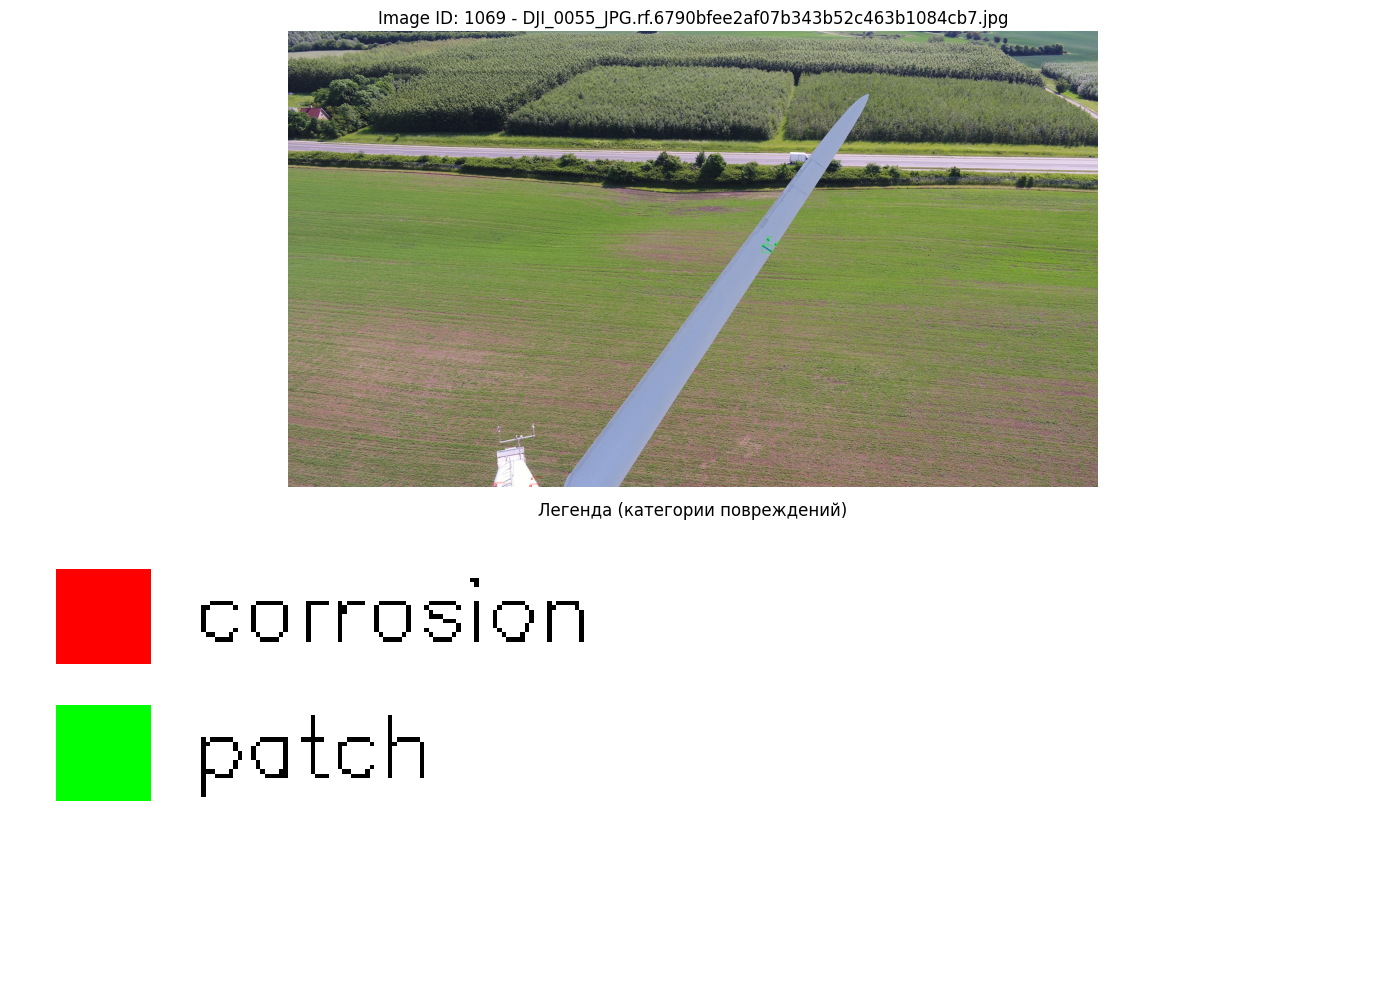

In [17]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Пути
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'
images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/train'

# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# Получаем информацию об изображении
image_info = next((img for img in coco_data['images'] if img['id'] == 1069), None)
if not image_info:
    raise FileNotFoundError("Изображение с image_id=1069 не найдено!")

# Загружаем изображение
image_path = os.path.join(images_folder, image_info['file_name'])
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Файл {image_path} не существует!")

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем в RGB

# Получаем все аннотации для этого изображения
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == 1069]

# Словарь категорий
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Цвета для разных категорий (BGR format)
colors = {
    1: (255, 0, 0),    # Красный для category_id=1
    5: (0, 255, 0),     # Зеленый для category_id=5
    # Добавьте другие категории по необходимости
}

# Рисуем все bounding boxes
for ann in annotations:
    bbox = ann['bbox']
    category_id = ann['category_id']
    category_name = categories.get(category_id, f"Unknown {category_id}")

    # Получаем цвет для данной категории (синий по умолчанию)
    color = colors.get(category_id, (0, 0, 255))

    # COCO bbox формат: [x, y, width, height]
    x, y, w, h = map(int, bbox)

    # Рисуем прямоугольник
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

    # Подписываем категорию
    cv2.putText(img, f"{category_name}", (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Создаем легенду
legend_img = np.zeros((100, 300, 3), dtype=np.uint8) + 255
for i, (cat_id, color) in enumerate(colors.items()):
    cat_name = categories.get(cat_id, f"Category {cat_id}")
    cv2.rectangle(legend_img, (10, 10 + i*30), (30, 30 + i*30), color, -1)
    cv2.putText(legend_img, cat_name, (40, 25 + i*30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

# Выводим изображение и легенду
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.title(f"Image ID: 1069 - {image_info['file_name']}")
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(legend_img)
plt.title("Легенда (категории повреждений)")
plt.axis('off')

plt.tight_layout()
plt.show()

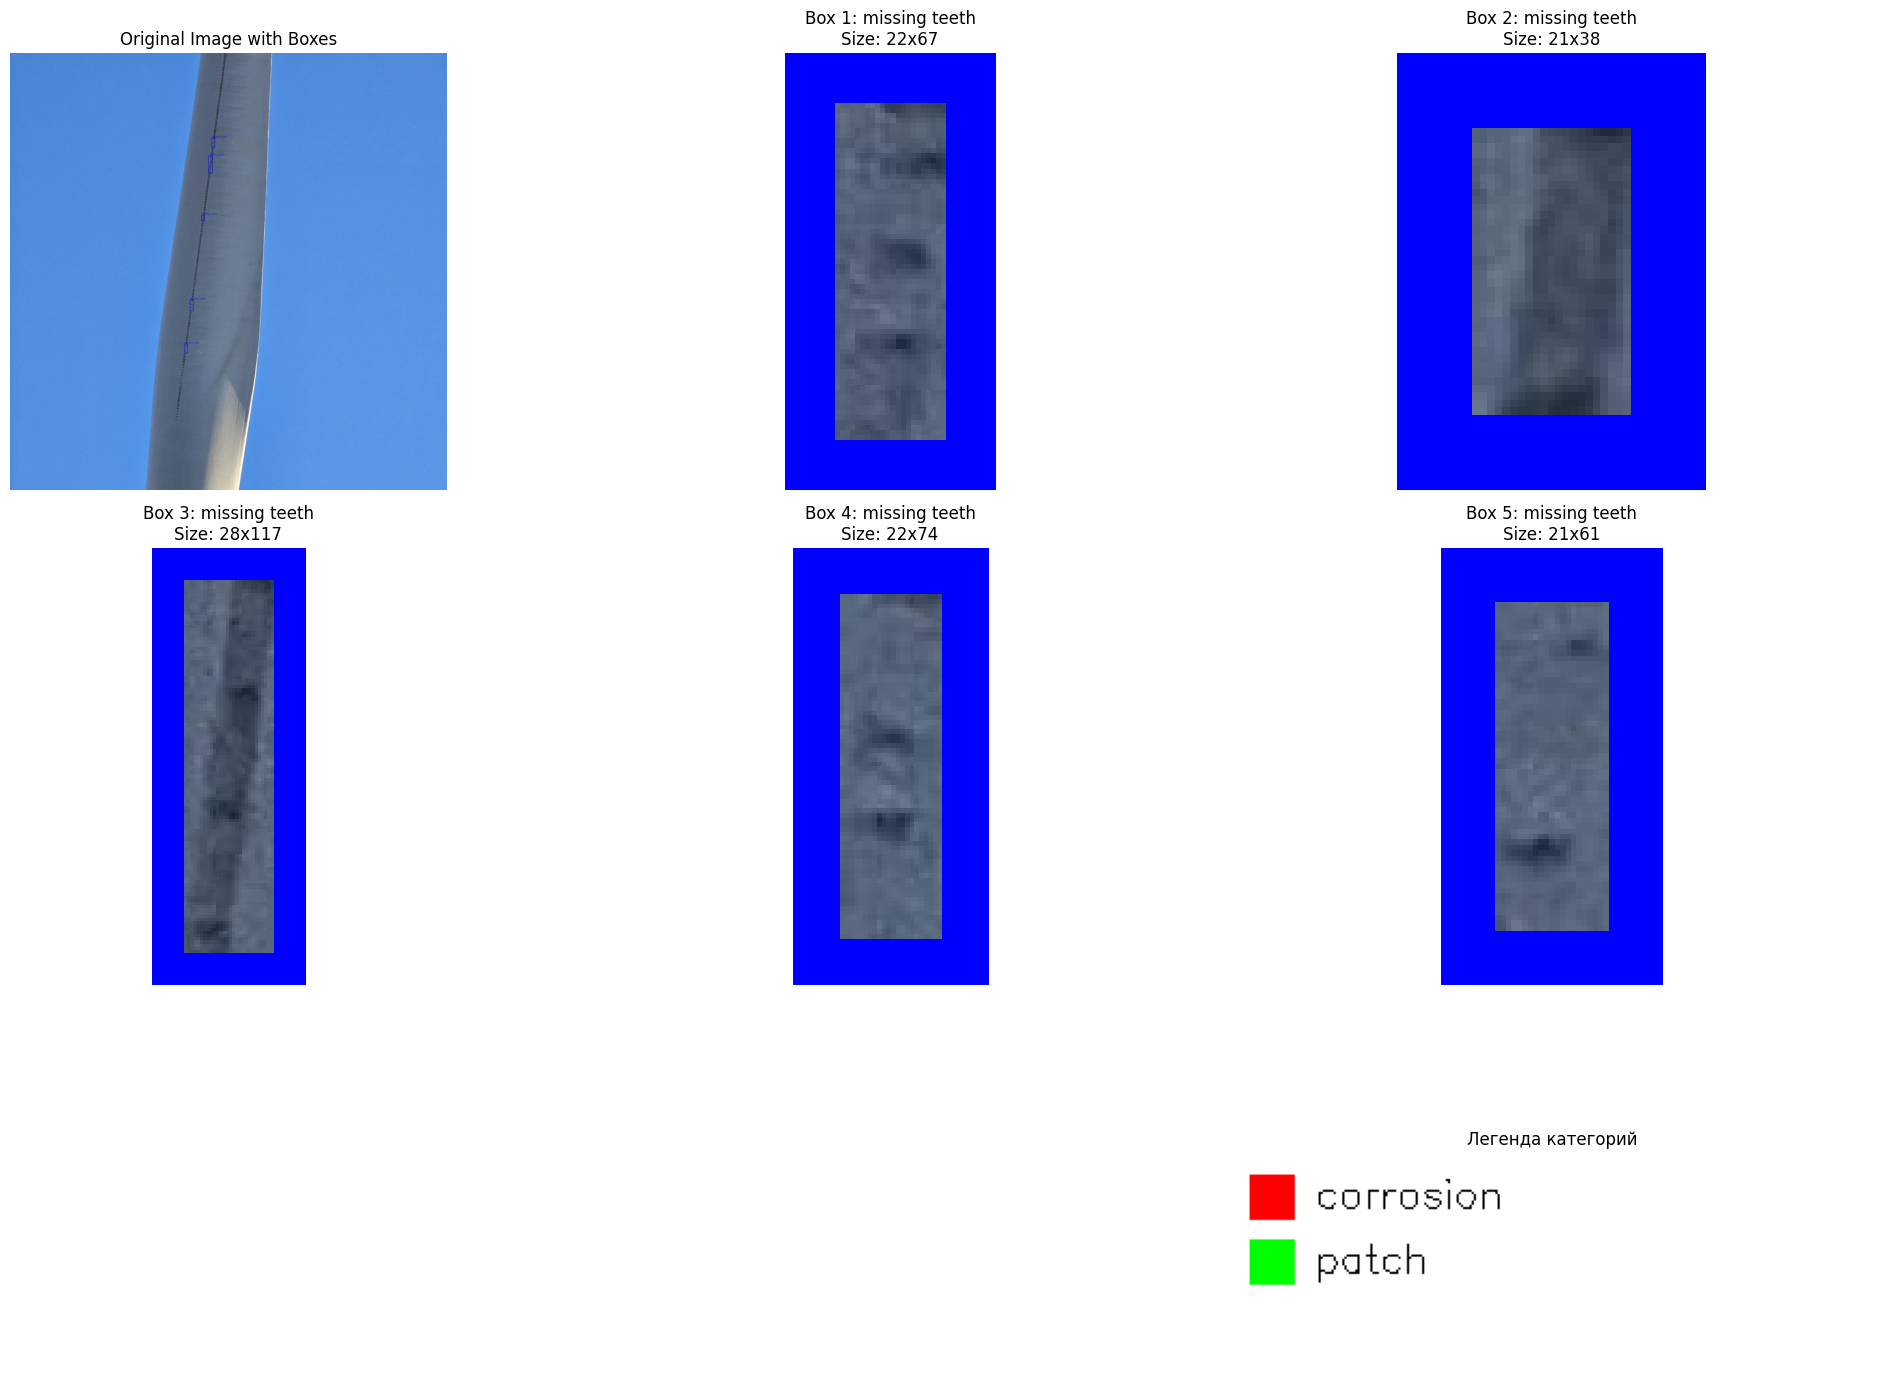

In [18]:
with open(annotations_path) as f:
    coco_data = json.load(f)

# Получаем информацию об изображении
image_info = next((img for img in coco_data['images'] if img['id'] == 10), None)
if not image_info:
    raise FileNotFoundError("Изображение с image_id=1069 не найдено!")

# Загружаем изображение
image_path = os.path.join(images_folder, image_info['file_name'])
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Файл {image_path} не существует!")

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем в RGB
img_with_boxes = img.copy()

# Получаем все аннотации для этого изображения
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == 10]

# Словарь категорий
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Цвета для разных категорий (RGB format)
colors = {
    1: (255, 0, 0),    # Красный для category_id=1
    5: (0, 255, 0),     # Зеленый для category_id=5
}

# Создаем фигуру для отображения
plt.figure(figsize=(20, 15))

# 1. Отображаем оригинальное изображение с bounding boxes
plt.subplot(3, 3, 1)
for ann in annotations:
    bbox = ann['bbox']
    category_id = ann['category_id']
    color = colors.get(category_id, (0, 0, 255))
    x, y, w, h = map(int, bbox)
    cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img_with_boxes, f"{categories[category_id]}", (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

plt.imshow(img_with_boxes)
plt.title("Original Image with Boxes")
plt.axis('off')

# 2. Отображаем каждый bounding box отдельно
for i, ann in enumerate(annotations, 2):
    bbox = ann['bbox']
    category_id = ann['category_id']
    x, y, w, h = map(int, bbox)

    # Вырезаем область изображения
    box_img = img[y:y+h, x:x+w]

    # Создаем подложку с рамкой
    padded_box = cv2.copyMakeBorder(box_img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=colors.get(category_id, (0, 0, 255)))

    plt.subplot(3, 3, i)
    plt.imshow(padded_box)
    plt.title(f"Box {i-1}: {categories[category_id]}\nSize: {w}x{h}")
    plt.axis('off')

# 3. Добавляем легенду
legend_img = np.zeros((100, 300, 3), dtype=np.uint8) + 255
for i, (cat_id, color) in enumerate(colors.items()):
    cat_name = categories.get(cat_id, f"Category {cat_id}")
    cv2.rectangle(legend_img, (10, 10 + i*30), (30, 30 + i*30), color, -1)
    cv2.putText(legend_img, cat_name, (40, 25 + i*30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

plt.subplot(3, 3, 9)
plt.imshow(legend_img)
plt.title("Легенда категорий")
plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
coco_data
549.535
22.43 * 24.5

549.535

In [20]:
#Переделка в дата фрейм
import json
import pandas as pd
from pathlib import Path

# Пути
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'



# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# Создаем словари для быстрого доступа
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
images = {img['id']: img['file_name'] for img in coco_data['images']}

# Собираем данные в нужном формате
data = []
for ann in coco_data['annotations']:
    image_id = ann['image_id']
    file_name = images.get(image_id, f"unknown_{image_id}")

    # Получаем данные аннотации
    category = categories.get(ann['category_id'], "unknown")
    x, y, w, h = ann['bbox']

    # Формируем запись в нужном формате
    obj_record = [category, x, y, w, h]

    # Ищем, есть ли уже запись для этого изображения
    found = False
    for entry in data:
        if entry['image_id'] == file_name:
            entry['objects'].append(obj_record)
            found = True
            break

    # Если не нашли - создаем новую запись
    if not found:
        data.append({
            'image_id': file_name,
            'objects': [obj_record]
        })

# Создаем DataFrame
df = pd.DataFrame(data)

# Преобразуем списки объектов в строки нужного формата
df['objects'] = df['objects'].apply(lambda x: str(x).replace("'", '"'))

# Сохраняем в CSV
#df.to_csv(output_csv_path, index=False)

#print(f"Аннотации успешно сохранены в {output_csv_path}")
print("\nПример данных:")
print(df.head())


Пример данных:
                                            image_id  \
0  20240120_164348_mp4-2256_jpg.rf.28f2f26322cb93...   
1  20240120_164348_mp4-2294_jpg.rf.533f2051c70d62...   
2  20240120_162823-1-_jpg.rf.27c7f2996e1fa0abd023...   
3  20240120_164348_mp4-2254_jpg.rf.77b3587c139b2f...   
4  20240120_162826_jpg.rf.947dc7b7b35cc012bbf7ba8...   

                                             objects  
0  [["corrosion", 999, 105, 4.87, 5.41], ["corros...  
1             [["corrosion", 1020, 113, 5.07, 7.27]]  
2  [["missing teeth", 1380, 583, 22.81, 67.58], [...  
3  [["corrosion", 998, 104, 5.07, 5.35], ["corros...  
4  [["missing teeth", 705, 1620, 24.34, 67.62], [...  


# Информация для Train

In [21]:
import json
from collections import defaultdict

# Путь к файлу аннотаций
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'

# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# 1) Общее количество записей в аннотациях
total_annotations = len(coco_data['annotations'])
print(f"1) Всего записей в аннотациях: {total_annotations}")

# 2) Количество уникальных картинок по image_id
unique_image_ids = set()
image_counts = defaultdict(int)

for ann in coco_data['annotations']:
    image_id = ann['image_id']
    unique_image_ids.add(image_id)
    image_counts[image_id] += 1

print(f"\n2) Уникальных картинок (по image_id): {len(unique_image_ids)}")

# Дополнительная статистика
print("\nДополнительная информация:")
print(f"- Всего изображений в файле: {len(coco_data['images'])}")
print(f"- Максимальное количество аннотаций на одно изображение: {max(image_counts.values())}")
print(f"- Минимальное количество аннотаций на одно изображение: {min(image_counts.values())}")
print(f"- Среднее количество аннотаций на изображение: {total_annotations/len(unique_image_ids):.1f}")

1) Всего записей в аннотациях: 9150

2) Уникальных картинок (по image_id): 754

Дополнительная информация:
- Всего изображений в файле: 1070
- Максимальное количество аннотаций на одно изображение: 246
- Минимальное количество аннотаций на одно изображение: 1
- Среднее количество аннотаций на изображение: 12.1


In [22]:
#Переделка в дата фрейм
import json
import pandas as pd
from pathlib import Path

# Пути
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'



# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# Создаем словари для быстрого доступа
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
images = {img['id']: img['file_name'] for img in coco_data['images']}

# Собираем данные в нужном формате
data = []
for ann in coco_data['annotations']:
    image_id = ann['image_id']
    file_name = images.get(image_id, f"unknown_{image_id}")

    # Получаем данные аннотации
    category = categories.get(ann['category_id'], "unknown")
    x, y, w, h = ann['bbox']

    # Формируем запись в нужном формате
    obj_record = [category, x, y, w, h]

    # Ищем, есть ли уже запись для этого изображения
    found = False
    for entry in data:
        if entry['image_id'] == file_name:
            entry['objects'].append(obj_record)
            found = True
            break

    # Если не нашли - создаем новую запись
    if not found:
        data.append({
            'image_id': file_name,
            'objects': [obj_record]
        })

# Создаем DataFrame
df = pd.DataFrame(data)

# Преобразуем списки объектов в строки нужного формата
df['objects'] = df['objects'].apply(lambda x: str(x).replace("'", '"'))

# Сохраняем в CSV
#df.to_csv(output_csv_path, index=False)

#print(f"Аннотации успешно сохранены в {output_csv_path}")
print("\nПример данных:")
print(df.head())


Пример данных:
                                            image_id  \
0  20240120_164348_mp4-2256_jpg.rf.28f2f26322cb93...   
1  20240120_164348_mp4-2294_jpg.rf.533f2051c70d62...   
2  20240120_162823-1-_jpg.rf.27c7f2996e1fa0abd023...   
3  20240120_164348_mp4-2254_jpg.rf.77b3587c139b2f...   
4  20240120_162826_jpg.rf.947dc7b7b35cc012bbf7ba8...   

                                             objects  
0  [["corrosion", 999, 105, 4.87, 5.41], ["corros...  
1             [["corrosion", 1020, 113, 5.07, 7.27]]  
2  [["missing teeth", 1380, 583, 22.81, 67.58], [...  
3  [["corrosion", 998, 104, 5.07, 5.35], ["corros...  
4  [["missing teeth", 705, 1620, 24.34, 67.62], [...  


# Информация для valid

In [23]:
import json
from collections import defaultdict

# Путь к файлу аннотаций
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/valid/_annotations.coco.json'

# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# 1) Общее количество записей в аннотациях
total_annotations = len(coco_data['annotations'])
print(f"1) Всего записей в аннотациях: {total_annotations}")

# 2) Количество уникальных картинок по image_id
unique_image_ids = set()
image_counts = defaultdict(int)

for ann in coco_data['annotations']:
    image_id = ann['image_id']
    unique_image_ids.add(image_id)
    image_counts[image_id] += 1

print(f"\n2) Уникальных картинок (по image_id): {len(unique_image_ids)}")

# Дополнительная статистика
print("\nДополнительная информация:")
print(f"- Всего изображений в файле: {len(coco_data['images'])}")
print(f"- Максимальное количество аннотаций на одно изображение: {max(image_counts.values())}")
print(f"- Минимальное количество аннотаций на одно изображение: {min(image_counts.values())}")
print(f"- Среднее количество аннотаций на изображение: {total_annotations/len(unique_image_ids):.1f}")

1) Всего записей в аннотациях: 2619

2) Уникальных картинок (по image_id): 185

Дополнительная информация:
- Всего изображений в файле: 271
- Максимальное количество аннотаций на одно изображение: 310
- Минимальное количество аннотаций на одно изображение: 1
- Среднее количество аннотаций на изображение: 14.2


In [25]:
#Переделка в дата фрейм
import json
import pandas as pd
from pathlib import Path

# Пути
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/valid/_annotations.coco.json'



# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# Создаем словари для быстрого доступа
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
images = {img['id']: img['file_name'] for img in coco_data['images']}

# Собираем данные в нужном формате
data = []
for ann in coco_data['annotations']:
    image_id = ann['image_id']
    file_name = images.get(image_id, f"unknown_{image_id}")

    # Получаем данные аннотации
    category = categories.get(ann['category_id'], "unknown")
    x, y, w, h = ann['bbox']

    # Формируем запись в нужном формате
    obj_record = [category, x, y, w, h]

    # Ищем, есть ли уже запись для этого изображения
    found = False
    for entry in data:
        if entry['image_id'] == file_name:
            entry['objects'].append(obj_record)
            found = True
            break

    # Если не нашли - создаем новую запись
    if not found:
        data.append({
            'image_id': file_name,
            'objects': [obj_record]
        })

# Создаем DataFrame
df_valid = pd.DataFrame(data)

# Преобразуем списки объектов в строки нужного формата
df_valid['objects'] = df_valid['objects'].apply(lambda x: str(x).replace("'", '"'))


#print(f"Аннотации успешно сохранены в {output_csv_path}")
print("\nПример данных:")
print(df_valid.head())


Пример данных:
                                            image_id  \
0  20240120_150757_jpg.rf.8af661983f654900e53e6f1...   
1  20240120_153803-0-_jpg.rf.b2d7933532f871b1339b...   
2  DJI_0415_JPG.rf.1ea5005e7ba6581dd18f9768604372...   
3  DJI_0407_JPG.rf.9f90779e5fa085d2d9bb0222b087b1...   
4  DJI_0226_JPG.rf.d0ff2bd696e70b5f06ab9fffa9f0ec...   

                                             objects  
0  [["lightning receptor", 1458, 1563, 35.9, 26.88]]  
1  [["missing teeth", 2321, 2425, 28.12, 48.03], ...  
2  [["lightning receptor", 2278, 663, 19.28, 21.4...  
3  [["missing teeth", 2772, 1725, 28.75, 21.67], ...  
4  [["corrosion", 4, 1393, 31.22, 76.27], ["corro...  


In [26]:
df_valid

image_id  \
0    20240120_150757_jpg.rf.8af661983f654900e53e6f1...   
1    20240120_153803-0-_jpg.rf.b2d7933532f871b1339b...   
2    DJI_0415_JPG.rf.1ea5005e7ba6581dd18f9768604372...   
3    DJI_0407_JPG.rf.9f90779e5fa085d2d9bb0222b087b1...   
4    DJI_0226_JPG.rf.d0ff2bd696e70b5f06ab9fffa9f0ec...   
..                                                 ...   
180  20240120_163052-0-_jpg.rf.6e33d3ec854c5e1248a4...   
181  20240120_163723-0-_jpg.rf.b764b5145b91bcc084f7...   
182  20240120_163651_jpg.rf.d397b36f7ab187e79932720...   
183  20240120_163730_jpg.rf.fc479b72d1ec281f8815e95...   
184  20240120_163724-0-_jpg.rf.17b03e45cb00eec48205...   

                                               objects  
0    [["lightning receptor", 1458, 1563, 35.9, 26.88]]  
1    [["missing teeth", 2321, 2425, 28.12, 48.03], ...  
2    [["lightning receptor", 2278, 663, 19.28, 21.4...  
3    [["missing teeth", 2772, 1725, 28.75, 21.67], ...  
4    [["corrosion", 4, 1393, 31.22, 76.27], ["corro...  
..                                                 ...  
180  [["missing teeth", 1250, 1323, 19.36, 29.37], ...  
181  [["corrosion", 1821, 1889, 58.18, 177.97], ["c...  
182  [["missing teeth", 872, 1816, 28.77, 32.52], [...  
183  [["missing teeth", 632, 246, 25.85, 12.93], ["...  
184  [["corrosion", 992, 685, 23.4, 65.83], ["corro...  

[185 rows x 2 columns]

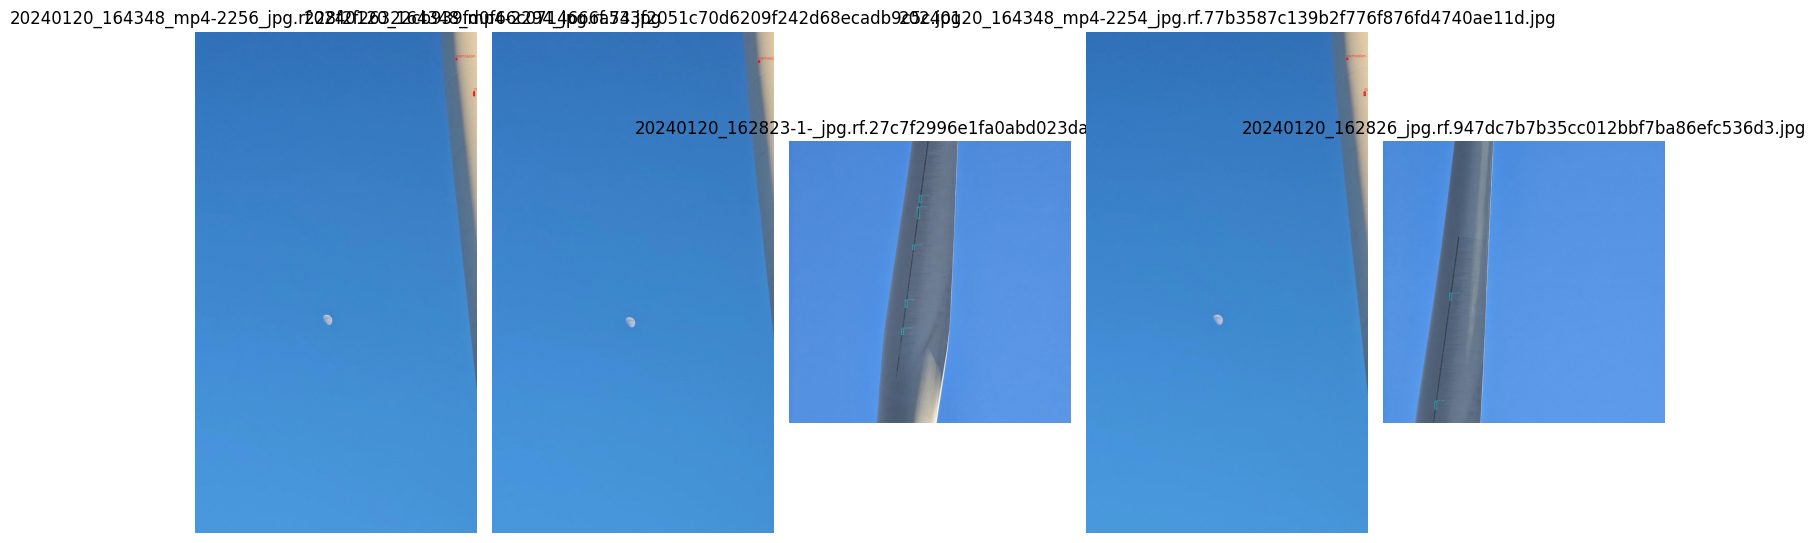

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow  # Для отображения в Colab
import os

# Путь к папке с изображениями
images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/'

# Функция для отрисовки bbox на изображении
def draw_boxes(image_path, objects):
    # Загружаем изображение
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не удалось загрузить изображение: {image_path}")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Цвета для разных классов (можно добавить больше)
    colors = {
        'corrosion': (255, 0, 0),    # Красный
        'lightning': (0, 255, 0),        # Зеленый
        'lightning receptor': (0, 0, 255)   ,
        'missing teeth': (0, 255, 255) ,
        'patch': (255, 0, 255)
    }


    # Рисуем каждый bounding box
    for obj in objects:
        category, x, y, w, h = obj
        color = colors.get(category.lower(), (0, 0, 255))  # Синий по умолчанию

        # Конвертируем координаты в целые числа
        x, y, w, h = int(x), int(y), int(w), int(h)

        # Рисуем прямоугольник
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Подписываем класс
        cv2.putText(img, category, (x, y - 5),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    return img

# Отрисовываем первые 5 изображений (или все, если меньше)
num_to_show = min(5, len(df))
plt.figure(figsize=(15, 10))

for i in range(num_to_show):
    row = df.iloc[i]
    image_path = os.path.join(images_folder, row['image_id'])

    # Преобразуем строку с объектами обратно в список
    try:
        objects = eval(row['objects'])  # Безопаснее, чем eval, но для примера сойдет
    except:
        print(f"Ошибка в parsing объектов для {row['image_id']}")
        continue

    # Рисуем bbox
    img_with_boxes = draw_boxes(image_path, objects)

    if img_with_boxes is not None:
        plt.subplot(1, num_to_show, i+1)
        plt.imshow(img_with_boxes)
        plt.title(row['image_id'])
        plt.axis('off')

plt.tight_layout()
plt.show()

# Аугментация

In [28]:
import json
import pandas as pd
import cv2
import albumentations as A
import numpy as np
import os
from tqdm import tqdm
import ast

# Загрузка и подготовка данных
annotations_path = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/_annotations.coco.json'
images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/train/'
output_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/augmented_train/'

# Создаем папку для аугментированных изображений
os.makedirs(output_folder, exist_ok=True)

# Загружаем аннотации
with open(annotations_path) as f:
    coco_data = json.load(f)

# Создаем словари для быстрого доступа
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
images = {img['id']: img['file_name'] for img in coco_data['images']}

# Собираем данные в нужном формате
data = []
for ann in coco_data['annotations']:
    image_id = ann['image_id']
    file_name = images.get(image_id, f"unknown_{image_id}")
    category = categories.get(ann['category_id'], "unknown")
    x, y, w, h = ann['bbox']
    obj_record = [category, x, y, w, h]

    found = False
    for entry in data:
        if entry['image_id'] == file_name:
            entry['objects'].append(obj_record)
            found = True
            break

    if not found:
        data.append({'image_id': file_name, 'objects': [obj_record]})

df = pd.DataFrame(data)
df['objects'] = df['objects'].apply(lambda x: str(x).replace("'", '"'))

# Определяем аугментации
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomRotate90(p=0.3),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.2),
], bbox_params=A.BboxParams(format='coco', label_fields=['category_names']))

# Функция для аугментации
def augment_image(row, augmentations_per_image=4):
    new_rows = []
    image_path = os.path.join(images_folder, row['image_id'])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Парсим объекты
    objects = ast.literal_eval(row['objects'])
    bboxes = [obj[1:] for obj in objects]
    category_names = [obj[0] for obj in objects]

    for i in range(augmentations_per_image):
        try:
            # Применяем аугментацию
            transformed = transform(
                image=image,
                bboxes=bboxes,
                category_names=category_names
            )

            # Сохраняем новое изображение
            new_filename = f"aug{i}_{row['image_id']}"
            cv2.imwrite(os.path.join(output_folder, new_filename),
                        cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR))

            # Формируем новую запись
            new_objects = [
                [cat, *bbox]
                for bbox, cat in zip(transformed['bboxes'], category_names)
            ]

            new_rows.append({
                'image_id': new_filename,
                'objects': str(new_objects).replace("'", '"')
            })
        except Exception as e:
            print(f"Ошибка при аугментации {row['image_id']}: {str(e)}")

    return new_rows

# Применяем аугментацию ко всем изображениям
augmented_data = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    augmented_data.append(row.to_dict())  # Добавляем оригинальные данные
    augmented_data.extend(augment_image(row))

# Создаем новый датафрейм
augmented_df = pd.DataFrame(augmented_data)

# Сохраняем результаты
augmented_df.to_csv(os.path.join(output_folder, 'augmented_annotations.csv'), index=False)

print(f"Оригинальный датасет: {len(df)} изображений")
print(f"Аугментированный датасет: {len(augmented_df)} изображений")
print("\nПример аугментированных данных:")
print(augmented_df.head())

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
  6%|▌         | 46/754 [00:23<03:15,  3.63it/s]

Ошибка при аугментации 20240120_162942_jpg.rf.0270798612537561a390df5dbdd72a98.jpg: Expected y_max for bbox [0.6520722 0.967246  0.6862934 1.0001336 0.       ] to be in the range [0.0, 1.0], got 1.0001336336135864.
Ошибка при аугментации 20240120_162942_jpg.rf.0270798612537561a390df5dbdd72a98.jpg: Expected y_max for bbox [0.6520722 0.967246  0.6862934 1.0001336 0.       ] to be in the range [0.0, 1.0], got 1.0001336336135864.
Ошибка при аугментации 20240120_162942_jpg.rf.0270798612537561a390df5dbdd72a98.jpg: Expected y_max for bbox [0.6520722 0.967246  0.6862934 1.0001336 0.       ] to be in the range [0.0, 1.0], got 1.0001336336135864.
Ошибка при аугментации 20240120_162942_jpg.rf.0270798612537561a390df5dbdd72a98.jpg: Expected y_max for bbox [0.6520722 0.967246  0.6862934 1.0001336 0.       ] to be in the range [0.0, 1.0], got 1.0001336336135864.


 20%|██        | 151/754 [01:34<05:21,  1.88it/s]

Ошибка при аугментации 20240120_162912_jpg.rf.29699b9c2c3bc8888f76923fb517f311.jpg: Expected y_max for bbox [0.7616979 0.9906417 0.8364572 1.0000601 0.       ] to be in the range [0.0, 1.0], got 1.0000600814819336.
Ошибка при аугментации 20240120_162912_jpg.rf.29699b9c2c3bc8888f76923fb517f311.jpg: Expected y_max for bbox [0.7616979 0.9906417 0.8364572 1.0000601 0.       ] to be in the range [0.0, 1.0], got 1.0000600814819336.
Ошибка при аугментации 20240120_162912_jpg.rf.29699b9c2c3bc8888f76923fb517f311.jpg: Expected y_max for bbox [0.7616979 0.9906417 0.8364572 1.0000601 0.       ] to be in the range [0.0, 1.0], got 1.0000600814819336.
Ошибка при аугментации 20240120_162912_jpg.rf.29699b9c2c3bc8888f76923fb517f311.jpg: Expected y_max for bbox [0.7616979 0.9906417 0.8364572 1.0000601 0.       ] to be in the range [0.0, 1.0], got 1.0000600814819336.


 22%|██▏       | 164/754 [01:42<06:08,  1.60it/s]


KeyboardInterrupt: 

In [ ]:
augmented_df.to_csv('/content/drive/MyDrive/CNN /Wind Turbine damage/ augmented_df_full.csv', index=False)

In [ ]:
augmented_df = pd.read_csv('/content/drive/MyDrive/CNN /Wind Turbine damage/ augmented_df_full.csv')

# Проверка
print(augmented_df.head())

                                            image_id  \
0  20240120_164348_mp4-2256_jpg.rf.28f2f26322cb93...   
1  aug0_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   
2  aug1_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   
3  aug2_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   
4  aug3_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   

                                             objects  
0  [["corrosion", 999, 105, 4.87, 5.41], ["corros...  
1  [["corrosion", 999.0000128746033, 1809.5899987...  
2  [["corrosion", 999.0000128746033, 105.0, 4.870...  
3  [["corrosion", 76.12997531890869, 105.0, 4.870...  
4  [["corrosion", 999.0000128746033, 105.0, 4.870...  


In [29]:
df_valid.to_csv('/content/drive/MyDrive/CNN/Wind Turbine damage/df_valid.csv', index=False)

In [ ]:
augmented_df

image_id  \
0     20240120_164348_mp4-2256_jpg.rf.28f2f26322cb93...   
1     aug0_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   
2     aug1_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   
3     aug2_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   
4     aug3_20240120_164348_mp4-2256_jpg.rf.28f2f2632...   
...                                                 ...   
3653  aug0_DJI_0103_JPG.rf.05c98b44d070a07ecfaadd11d...   
3654  aug1_DJI_0103_JPG.rf.05c98b44d070a07ecfaadd11d...   
3655  aug2_DJI_0103_JPG.rf.05c98b44d070a07ecfaadd11d...   
3656  aug3_DJI_0103_JPG.rf.05c98b44d070a07ecfaadd11d...   
3657  DJI_0055_JPG.rf.6790bfee2af07b343b52c463b1084c...   

                                                objects  
0     [["corrosion", 999, 105, 4.87, 5.41], ["corros...  
1     [["corrosion", 999.0000128746033, 1809.5899987...  
2     [["corrosion", 999.0000128746033, 105.0, 4.870...  
3     [["corrosion", 76.12997531890869, 105.0, 4.870...  
4     [["corrosion", 999.0000128746033, 105.0, 4.870...  
...                                                 ...  
3653  [["corrosion", 2074.666190178206, 1088.0736795...  
3654  [["corrosion", 1934.4455142345755, 2100.978297...  
3655  [["corrosion", 3421.0201835632324, 1067.280020...  
3656  [["corrosion", 3488.393462434817, 1777.6090397...  
3657  [["corrosion", 1338, 2950, 20.95, 20.06], ["co...  

[3658 rows x 2 columns]

In [ ]:
#Перенос данных
import os
import shutil

# Укажите пути к исходной и целевой папкам
source_dir = '/content/drive/MyDrive/CNN/Wind Turbine damage/train'
target_dir = '/content/drive/MyDrive/CNN/Wind Turbine damage/augmented_train'

# Создайте целевую папку, если она не существует
os.makedirs(target_dir, exist_ok=True)

# Перенос всех файлов из исходной папки в целевую
for filename in os.listdir(source_dir):
    # Полный путь к файлу
    source_file = os.path.join(source_dir, filename)
    target_file = os.path.join(target_dir, filename)

    # Проверка, является ли это файлом (а не папкой)
    if os.path.isfile(source_file):
        shutil.copy2(source_file, target_file)  # Копируем файл с сохранением метаданных

print("Перенос завершен!")

Перенос завершен!


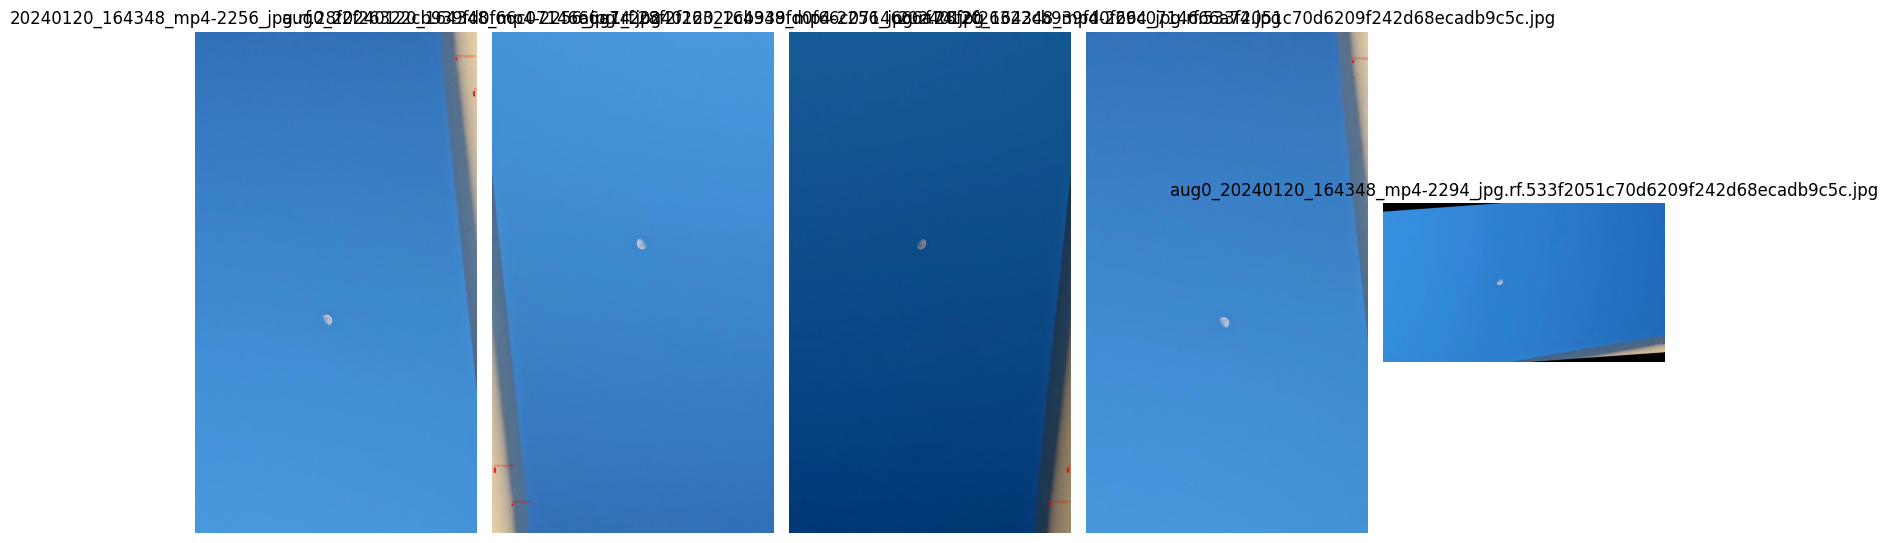

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow  # Для отображения в Colab
import os

# Путь к папке с изображениями
images_folder = '/content/drive/MyDrive/CNN /Wind Turbine damage/augmented_train'

# Функция для отрисовки bbox на изображении
def draw_boxes(image_path, objects):
    # Загружаем изображение
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не удалось загрузить изображение: {image_path}")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Цвета для разных классов (можно добавить больше)
    colors = {
        'corrosion': (255, 0, 0),    # Красный
        'lightning': (0, 255, 0),        # Зеленый
        'lightning receptor': (0, 0, 255)   ,
        'missing teeth': (0, 255, 255) ,
        'patch': (255, 0, 255)
    }


    # Рисуем каждый bounding box
    for obj in objects:
        category, x, y, w, h = obj
        color = colors.get(category.lower(), (0, 0, 255))  # Синий по умолчанию

        # Конвертируем координаты в целые числа
        x, y, w, h = int(x), int(y), int(w), int(h)

        # Рисуем прямоугольник
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Подписываем класс
        cv2.putText(img, category, (x, y - 5),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    return img

# Отрисовываем первые 5 изображений (или все, если меньше)
num_to_show = min(5, len(augmented_df))
plt.figure(figsize=(15, 10))

for i in range(num_to_show):
    row = augmented_df.iloc[i]
    image_path = os.path.join(images_folder, row['image_id'])

    # Преобразуем строку с объектами обратно в список
    try:
        objects = eval(row['objects'])  # Безопаснее, чем eval, но для примера сойдет
    except:
        print(f"Ошибка в parsing объектов для {row['image_id']}")
        continue

    # Рисуем bbox
    img_with_boxes = draw_boxes(image_path, objects)

    if img_with_boxes is not None:
        plt.subplot(1, num_to_show, i+1)
        plt.imshow(img_with_boxes)
        plt.title(row['image_id'])
        plt.axis('off')

plt.tight_layout()
plt.show()

# YOLO обучение

## Подготовка папок для YOLO

In [33]:
import os
import shutil
import yaml
import cv2
import pandas as pd

# Создаем структуру папок для YOLOv8
def create_yolo_structure(base_path):
    os.makedirs(base_path, exist_ok=True)
    os.makedirs(os.path.join(base_path, 'images', 'train'), exist_ok=True)
    os.makedirs(os.path.join(base_path, 'images', 'val'), exist_ok=True)
    os.makedirs(os.path.join(base_path, 'labels', 'train'), exist_ok=True)
    os.makedirs(os.path.join(base_path, 'labels', 'val'), exist_ok=True)

# Функция для обработки одного датафрейма
def process_dataframe(df, images_folder, output_folder, dataset_type):
    class_names = ['corrosion', 'lightning', 'lightning receptor', 'missing teeth', 'patch']
    class_to_idx = {name: idx for idx, name in enumerate(class_names)}

    for _, row in df.iterrows():
        image_path = os.path.join(images_folder, row['image_id'])
        dest_image_path = os.path.join(output_folder, 'images', dataset_type, row['image_id'])

        # Копируем изображение
        if os.path.exists(image_path):
            shutil.copy(image_path, dest_image_path)
        else:
            print(f"Изображение не найдено: {image_path}")
            continue

        # Создаем аннотации
        txt_filename = os.path.splitext(row['image_id'])[0] + '.txt'
        txt_path = os.path.join(output_folder, 'labels', dataset_type, txt_filename)

        try:
            objects = eval(row['objects'])
        except:
            print(f"Ошибка при парсинге объектов для {row['image_id']}")
            continue

        with open(txt_path, 'w') as f:
            for obj in objects:
                if len(obj) != 5:
                    continue

                class_name, x, y, w, h = obj
                class_idx = class_to_idx.get(class_name.lower())

                if class_idx is None:
                    continue

                img = cv2.imread(image_path)
                if img is None:
                    continue

                img_height, img_width = img.shape[:2]
                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width = w / img_width
                height = h / img_height

                f.write(f"{class_idx} {x_center} {y_center} {width} {height}\n")

# Пути
base_path = '/content/yolo_wind_turbine'
#train_images_folder = '/content/drive/MyDrive/CNN /Wind Turbine damage/augmented_train'
train_images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/train'
valid_images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/valid'

# Предполагаем, что у вас есть:
# df_train - датафрейм с тренировочными данными
# df_valid - датафрейм с валидационными данными

# Создаем структуру папок
create_yolo_structure(base_path)

# Обрабатываем тренировочные данные
#process_dataframe(augmented_df, train_images_folder, base_path, 'train')
process_dataframe(df, train_images_folder, base_path, 'train')

# Обрабатываем валидационные данные
process_dataframe(df_valid, valid_images_folder, base_path, 'val')

# Создаем YAML файл конфигурации
yaml_content = {
    'path': base_path,
    'train': 'images/train',
    'val': 'images/val',
    'names': ['corrosion', 'lightning', 'lightning receptor', 'missing teeth', 'patch']
}

with open(os.path.join(base_path, 'wind_turbine.yaml'), 'w') as f:
    yaml.dump(yaml_content, f)

print("Подготовка данных завершена!")

Подготовка данных завершена!


## Обучение

In [34]:
!pip install -U ultralytics sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.5 MB/s eta 0:00:00
   

In [35]:
!pip install ultralytics

In [3]:
import torch
from ultralytics import YOLO
import os

# Проверка доступности GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Используемое устройство: {device}")
base_path = '/content/yolo_wind_turbine'
train_images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/augmented_train'
valid_images_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/valid'

# Загрузка модели и перенос на GPU
model = YOLO('yolo11n.pt').to(device)

# Параметры обучения
results = model.train(
    data=os.path.join(base_path, 'wind_turbine.yaml'),
    epochs=10,
    imgsz=1024,
    batch=2,  # Уменьшите, если не хватает памяти GPU
    patience=10,
    iou=0.5,
    device=0,  # Явное указание GPU (0 - первый GPU)
    workers=4,  # Число процессов загрузки данных (оставляем на CPU)
    single_cls=False,  # Для многоклассовой детекции
    amp=True,  # Смешанная точность (FP16/FP32)
    lr0=0.01,  # Начальная скорость обучения
    weight_decay=0.0005,  # Регуляризация
    optimizer='AdamW',  # Альтернатива: 'SGD', 'Adam'
    hsv_h=0.015,  # Аугментация: оттенок
    hsv_s=0.7,    # Аугментация: насыщенность
    hsv_v=0.4,    # Аугментация: яркость
    degrees=45,   # Аугментация: поворот
    flipud=0.5,   # Аугментация: отражение по вертикали
)

# Проверка использования GPU
print(f"Модель на GPU: {next(model.parameters()).is_cuda}")

Используемое устройство: cuda
Ultralytics 8.3.150 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_wind_turbine/wind_turbine.yaml, degrees=45, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.5, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspect

train: Scanning /content/yolo_wind_turbine/labels/train.cache... 754 images, 0 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 398.9±167.1 MB/s, size: 1287.3 KB)


val: Scanning /content/yolo_wind_turbine/labels/val.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.29G      3.554      4.435      1.476         13       1024: 100%|██████████| 377/377 [01:55<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  3.01it/s]

                   all        185       2619      0.422    0.00591    0.00175   0.000314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.37G      3.519      3.662      1.439          5       1024: 100%|██████████| 377/377 [01:38<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  3.10it/s]

                   all        185       2619    0.00392     0.0814     0.0059    0.00121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.38G      3.453      3.591      1.394         30       1024: 100%|██████████| 377/377 [01:41<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.63it/s]


                   all        185       2619      0.221     0.0154    0.00577    0.00125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.38G      3.446      3.494      1.402         24       1024: 100%|██████████| 377/377 [01:40<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:09<00:00,  4.74it/s]


                   all        185       2619      0.431     0.0248    0.00756    0.00174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.38G      3.367      3.301      1.343          6       1024: 100%|██████████| 377/377 [01:36<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.89it/s]


                   all        185       2619       0.45     0.0149     0.0133    0.00316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.38G      3.317      3.222      1.329         19       1024: 100%|██████████| 377/377 [01:38<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.59it/s]


                   all        185       2619     0.0189     0.0304    0.00804    0.00189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.38G      3.362      3.185      1.329         47       1024: 100%|██████████| 377/377 [01:44<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.90it/s]

                   all        185       2619      0.678     0.0175     0.0157    0.00338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.4G      3.321      3.073      1.313          8       1024: 100%|██████████| 377/377 [01:35<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]

                   all        185       2619      0.658     0.0195     0.0143    0.00282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.41G      3.183       2.98      1.284         19       1024: 100%|██████████| 377/377 [01:44<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:13<00:00,  3.36it/s]

                   all        185       2619      0.465     0.0254     0.0191    0.00467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.41G      3.214       2.91      1.291         12       1024: 100%|██████████| 377/377 [01:36<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]

                   all        185       2619      0.522     0.0325     0.0187    0.00477



10 epochs completed in 0.320 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.60it/s]


                   all        185       2619      0.521     0.0325     0.0187    0.00476
             corrosion        134       2150      0.143     0.0633     0.0258    0.00594
             lightning          9          9          1          0          0          0
    lightning receptor         10         12          1          0          0          0
         missing teeth         81        391      0.234     0.0818     0.0532     0.0109
                 patch         16         57      0.227     0.0175     0.0147    0.00701
Speed: 0.6ms preprocess, 9.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train
Модель на GPU: False


In [4]:
# Загружаем лучшую обученную модель
best_model = YOLO(os.path.join('runs', 'detect', 'train', 'weights', 'best.pt'))

# Валидация
metrics = best_model.val()
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")


Ultralytics 8.3.150 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3241.3±475.5 MB/s, size: 1270.3 KB)


val: Scanning /content/yolo_wind_turbine/labels/val.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:16<00:00,  1.37s/it]


                   all        185       2619      0.516     0.0331     0.0182    0.00476
             corrosion        134       2150       0.13      0.066     0.0245    0.00611
             lightning          9          9          1          0          0          0
    lightning receptor         10         12          1          0          0          0
         missing teeth         81        391      0.216     0.0818     0.0515     0.0102
                 patch         16         57      0.233     0.0175      0.015    0.00747
Speed: 3.2ms preprocess, 10.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
mAP50-95: 0.004760075790456194
mAP50: 0.018199774489926525
mAP75: 0.0015651497051415394


# Предсказания

In [6]:
!pip install sahi

In [10]:
import os
import cv2
import json
import pandas as pd
from ultralytics import YOLO
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

# Загрузка модели YOLO
yolo_model = YOLO('runs/detect/train/weights/best.pt')

# Создаем модель SAHI
detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model=yolo_model,
    confidence_threshold=0.25,
    device="cuda:0" if torch.cuda.is_available() else "cpu"
)

# Путь к тестовым изображениям
test_folder = '/content/drive/MyDrive/CNN/Wind Turbine damage/test'

# Собираем результаты
results = []

# Параметры для слайсинга
slice_height = 512  # высота слайса
slice_width = 512   # ширина слайса
overlap_height_ratio = 0.2  # перекрытие по высоте
overlap_width_ratio = 0.2   # перекрытие по ширине

for img_name in os.listdir(test_folder):
    if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    img_path = os.path.join(test_folder, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue

    # Делаем предсказание с SAHI
    result = get_sliced_prediction(
        img,
        detection_model,
        slice_height=slice_height,
        slice_width=slice_width,
        overlap_height_ratio=overlap_height_ratio,
        overlap_width_ratio=overlap_width_ratio,
        perform_standard_pred=True,  # также выполнять предсказание на полном изображении
        postprocess_type="NMS",  # тип постобработки
        postprocess_match_metric="IOS",  # метрика для сопоставления боксов
        postprocess_match_threshold=0.5  # порог для сопоставления
    )

    # Обрабатываем результаты для текущего изображения
    img_objects = []
    for pred in result.object_prediction_list:
        # Получаем данные
        class_name = pred.category.name
        conf = pred.score.value  # Вероятность (confidence)
        x1 = pred.bbox.minx
        y1 = pred.bbox.miny
        x2 = pred.bbox.maxx
        y2 = pred.bbox.maxy
        w = x2 - x1
        h = y2 - y1

        # Добавляем в формате [class, x, y, w, h, confidence]
        img_objects.append([class_name, x1, y1, w, h, conf])

    # Добавляем в общие результаты
    results.append({
        "image_id": img_name,
        "objects": img_objects
    })

# Создаем DataFrame
df_results = pd.DataFrame(results)

Performing prediction on 15 slices.
Performing prediction on 64 slices.
Performing prediction on 15 slices.
Performing prediction on 225 slices.
Performing prediction on 15 slices.
Performing prediction on 15 slices.
Performing prediction on 225 slices.
Performing prediction on 15 slices.
Performing prediction on 15 slices.
Performing prediction on 15 slices.
Performing prediction on 15 slices.
Performing prediction on 15 slices.
Performing prediction on 225 slices.
Performing prediction on 64 slices.
Performing prediction on 15 slices.
Performing prediction on 64 slices.
Performing prediction on 225 slices.
Performing prediction on 15 slices.
Performing prediction on 225 slices.
Performing prediction on 15 slices.
Performing prediction on 15 slices.
Performing prediction on 15 slices.
Performing prediction on 64 slices.
Performing prediction on 64 slices.
Performing prediction on 15 slices.
Performing prediction on 64 slices.
Performing prediction on 64 slices.
Performing prediction o

In [11]:
df_results

image_id  \
0    20240120_155211_mp4-0015_jpg.rf.62ada8738a17b0...   
1    20240120_150729_jpg.rf.5925f54483de8cc52f75fdd...   
2    20240120_155211_mp4-0077_jpg.rf.17e71709fd53ea...   
3    20240120_153748-0-_jpg.rf.6c50a8089bf3ccd32bb6...   
4    20240120_155211_mp4-0088_jpg.rf.ef0c44646fd146...   
..                                                 ...   
146  DJI_0985_JPG.rf.aa69ccc4ef0830be243fc06f42e91c...   
147  DJI_0995_JPG.rf.09f70312420808da47c3a4aaf186ca...   
148  DJI_0992_JPG.rf.8adbc7b8fa4895501467ea9eaf53f0...   
149  DJI_0980_JPG.rf.9aae1abc3fdead93968f7a06073e9b...   
150  DJI_0991_JPG.rf.54622f4cc224fae47bb990abe7a57d...   

                                               objects  
0                                                   []  
1                                                   []  
2                                                   []  
3                                                   []  
4                                                   []  
..                                                 ...  
146                                                 []  
147                                                 []  
148  [[corrosion, 1896.81005859375, 904.58752441406...  
149                                                 []  
150                                                 []  

[151 rows x 2 columns]

In [12]:
df_results['objects'] = df_results['objects'].apply(lambda x: str(x).replace("'", '"'))
df_results

image_id  \
0    20240120_155211_mp4-0015_jpg.rf.62ada8738a17b0...   
1    20240120_150729_jpg.rf.5925f54483de8cc52f75fdd...   
2    20240120_155211_mp4-0077_jpg.rf.17e71709fd53ea...   
3    20240120_153748-0-_jpg.rf.6c50a8089bf3ccd32bb6...   
4    20240120_155211_mp4-0088_jpg.rf.ef0c44646fd146...   
..                                                 ...   
146  DJI_0985_JPG.rf.aa69ccc4ef0830be243fc06f42e91c...   
147  DJI_0995_JPG.rf.09f70312420808da47c3a4aaf186ca...   
148  DJI_0992_JPG.rf.8adbc7b8fa4895501467ea9eaf53f0...   
149  DJI_0980_JPG.rf.9aae1abc3fdead93968f7a06073e9b...   
150  DJI_0991_JPG.rf.54622f4cc224fae47bb990abe7a57d...   

                                               objects  
0                                                   []  
1                                                   []  
2                                                   []  
3                                                   []  
4                                                   []  
..                                                 ...  
146                                                 []  
147                                                 []  
148  [["corrosion", 1896.81005859375, 904.587524414...  
149                                                 []  
150                                                 []  

[151 rows x 2 columns]

In [13]:
df_results.to_csv('predictions.csv', index=False)

In [14]:
!cp -r /content/runs /content/drive/MyDrive/